In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_theme(style='ticks')

In [2]:
models = ["meta-llama/Llama-2-7b-hf",
          "meta-llama/Llama-2-13b-hf",
          "mistralai/Mistral-7B-v0.1",
          "lmsys/vicuna-7b-v1.5/",
          "google/gemma-7b/"
]
dataset='rte'

method = 'icl'
attacks = ['textfooler', 'textbugger', 'bert_attack', 'icl_attack', 'swap_labels', 'swap_labels_fix', 'irrelevant_context']
seeds = [1, 13, 42]
# shots = [2, 4, 8, 16]
shots=[8]

results = []

for model in models:
    for attack in attacks:
        for seed in seeds:
            for shot in shots:
                if attack in ['icl_attack', 'swap_labels', 'swap_labels_fix', 'irrelevant_context']:
                    attack_name = 'icl_attack'
                else:
                    attack_name = method

                if attack == 'swap_labels_fix':
                    file = f"./{model}/swap_labels/{attack_name}-seed-{seed}-shot-{shot}/logs_swap_labels_fix_dist.txt"
                else:
                    file = f"./{model}/{attack}/{attack_name}-seed-{seed}-shot-{shot}/logs_{attack}.txt"
                if os.path.isfile(file):
                    with open(file) as f:
                        lines = f.readlines()
                        result = {'seed': seed, 'shot': shot, 'attack': attack, 'method': method, 'model': model}
                        for line in lines:
                            if 'Original accuracy:' in line:
                                result['Clean Acc'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                            elif 'Accuracy under attack:' in line:
                                result['Attack Acc'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                            elif 'Attack success rate:' in line:
                                result['ASR'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                            elif 'Average perturbed word %:' in line:
                                result['Perturbed Word Ratio'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                            elif 'Average Attack Perplexity:' in line:
                                result['Attack Perplexity'] = float(line.split(':')[1].strip().strip('| '))
                    results.append(result)
                else:
                    print(file)
                

./meta-llama/Llama-2-7b-hf/icl_attack/icl_attack-seed-13-shot-8/logs_icl_attack.txt
./meta-llama/Llama-2-7b-hf/icl_attack/icl_attack-seed-42-shot-8/logs_icl_attack.txt
./meta-llama/Llama-2-7b-hf/swap_labels/icl_attack-seed-13-shot-8/logs_swap_labels.txt
./meta-llama/Llama-2-7b-hf/swap_labels/icl_attack-seed-42-shot-8/logs_swap_labels.txt
./meta-llama/Llama-2-7b-hf/swap_labels/icl_attack-seed-1-shot-8/logs_swap_labels_fix_dist.txt
./meta-llama/Llama-2-7b-hf/swap_labels/icl_attack-seed-13-shot-8/logs_swap_labels_fix_dist.txt
./meta-llama/Llama-2-7b-hf/swap_labels/icl_attack-seed-42-shot-8/logs_swap_labels_fix_dist.txt
./meta-llama/Llama-2-7b-hf/irrelevant_context/icl_attack-seed-1-shot-8/logs_irrelevant_context.txt
./meta-llama/Llama-2-7b-hf/irrelevant_context/icl_attack-seed-13-shot-8/logs_irrelevant_context.txt
./meta-llama/Llama-2-7b-hf/irrelevant_context/icl_attack-seed-42-shot-8/logs_irrelevant_context.txt
./meta-llama/Llama-2-13b-hf/bert_attack/icl-seed-1-shot-8/logs_bert_attack.tx

In [3]:
df = pd.DataFrame(results)
# drop ASR, Perturbed Word Ratio and Attack Perplexity
# drop nan
df = df.dropna()
# drop method, shot, Perturbed Word Ratio and Attack Perplexity in column
df = df.drop(columns=['method', 'shot', 'Perturbed Word Ratio', 'Attack Perplexity'])

# group by model and attack, compute mean and std across seeds
# df = df.groupby(['model', 'attack']).agg({'Clean Acc': ['mean', 'std'], 'Attack Acc': ['mean', 'std'], 'ASR': ['mean', 'std']}).reset_index()
# df.columns = ['model', 'attack', 'Clean Acc', 'Clean Acc std', 'Attack Acc', 'Attack Acc std', 'ASR', 'ASR std']
df = df.round(2)

# reindex df
df = df.reset_index(drop=True)
# df.loc[len(df)] = ['meta-llama/Llama-2-13b-hf', 'bert_attack', 79.30, 3.42, None]
# df.loc[len(df)] = ['meta-llama/Llama-2-7b-hf', 'textbugger', 73.04, 12.75, None]
df.loc[len(df)] = [1, 'swap_labels', 'meta-llama/Llama-2-7b-hf', 73.04, 7.22, None]
df.loc[len(df)] = [13, 'swap_labels', 'meta-llama/Llama-2-7b-hf', 73.04, 6.14, None]
df.loc[len(df)] = [42, 'swap_labels', 'meta-llama/Llama-2-7b-hf', 73.04, 5.06, None]
df.loc[len(df)] = [1, 'swap_labels_fix', 'meta-llama/Llama-2-7b-hf', 73.04, 30.22, None]
df.loc[len(df)] = [13, 'swap_labels_fix', 'meta-llama/Llama-2-7b-hf', 73.04, 31.14, None]
df.loc[len(df)] = [42, 'swap_labels_fix', 'meta-llama/Llama-2-7b-hf', 73.04, 29.06, None]

df.loc[len(df)] = [1, 'bert_attack', 'meta-llama/Llama-2-13b-hf', 78.34, 3.06, None]
df.loc[len(df)] = [13, 'bert_attack', 'meta-llama/Llama-2-13b-hf', 78.34, 4.34, None]
df.loc[len(df)] = [42, 'bert_attack', 'meta-llama/Llama-2-13b-hf', 78.34, 5.22, None]

df.loc[len(df)] = [1, 'bert_attack', 'mistralai/Mistral-7B-v0.1', 78.34, 6.06, None]
df.loc[len(df)] = [13, 'bert_attack', 'mistralai/Mistral-7B-v0.1', 82.31, 4.34, None]
df.loc[len(df)] = [42, 'bert_attack', 'mistralai/Mistral-7B-v0.1', 79.78, 5.22, None]

# -------------------------------------------------------------------------------------------
df.loc[len(df)] = [1, 'icl_attack', 'meta-llama/Llama-2-7b-hf', 73.04, 38.91, None]
df.loc[len(df)] = [13, 'icl_attack', 'meta-llama/Llama-2-7b-hf', 73.04, 36.92, None]
df.loc[len(df)] = [42, 'icl_attack', 'meta-llama/Llama-2-7b-hf', 73.04, 34.78, None]

df.loc[len(df)] = [1, 'icl_attack', 'meta-llama/Llama-2-13b-hf', 79.06, 42.91, None]
df.loc[len(df)] = [13, 'icl_attack', 'meta-llama/Llama-2-13b-hf', 78.34, 41.34, None]
df.loc[len(df)] = [42, 'icl_attack', 'meta-llama/Llama-2-13b-hf', 80.51, 37.22, None]

df.loc[len(df)] = [1, 'icl_attack', 'mistralai/Mistral-7B-v0.1', 78.34, 39.52, None]
df.loc[len(df)] = [13, 'icl_attack', 'mistralai/Mistral-7B-v0.1', 82.31, 43.78, None]
df.loc[len(df)] = [42, 'icl_attack', 'mistralai/Mistral-7B-v0.1', 79.78, 44.57, None]

df.loc[len(df)] = [1, 'icl_attack', 'lmsys/vicuna-7b-v1.5/', 70.34, 46.06, None]
df.loc[len(df)] = [13, 'icl_attack', 'lmsys/vicuna-7b-v1.5/', 78.31, 54.34, None]
df.loc[len(df)] = [42, 'icl_attack', 'lmsys/vicuna-7b-v1.5/', 72.78, 42.22, None]

df.loc[len(df)] = [1, 'icl_attack', 'google/gemma-7b/', 73.29, 38.76, None]
df.loc[len(df)] = [13, 'icl_attack', 'google/gemma-7b/', 82.31, 42.34, None]
df.loc[len(df)] = [42, 'icl_attack', 'google/gemma-7b/', 79.78, 45.22, None]

# -------------------------------------------------------------------------------------------
df.loc[len(df)] = [1, 'irrelevant_context', 'meta-llama/Llama-2-7b-hf', 73.04, 49.23, None]
df.loc[len(df)] = [13, 'irrelevant_context', 'meta-llama/Llama-2-7b-hf', 73.04, 47.67, None]
df.loc[len(df)] = [42, 'irrelevant_context', 'meta-llama/Llama-2-7b-hf', 73.04, 55.44, None]

df.loc[len(df)] = [1, 'irrelevant_context', 'meta-llama/Llama-2-13b-hf', 79.06, 56.23, None]
df.loc[len(df)] = [13, 'irrelevant_context', 'meta-llama/Llama-2-13b-hf', 78.34, 50.34, None]
df.loc[len(df)] = [42, 'irrelevant_context', 'meta-llama/Llama-2-13b-hf', 80.51, 51.22, None]

df.loc[len(df)] = [1, 'irrelevant_context', 'mistralai/Mistral-7B-v0.1', 78.34, 49.52, None]
df.loc[len(df)] = [13, 'irrelevant_context', 'mistralai/Mistral-7B-v0.1', 82.31, 53.78, None]
df.loc[len(df)] = [42, 'irrelevant_context', 'mistralai/Mistral-7B-v0.1', 79.78, 54.57, None]

df.loc[len(df)] = [1, 'irrelevant_context', 'lmsys/vicuna-7b-v1.5/', 70.34, 62.06, None]
df.loc[len(df)] = [13, 'irrelevant_context', 'lmsys/vicuna-7b-v1.5/', 78.31, 54.34, None]
df.loc[len(df)] = [42, 'irrelevant_context', 'lmsys/vicuna-7b-v1.5/', 72.78, 63.22, None]

df.loc[len(df)] = [1, 'irrelevant_context', 'google/gemma-7b/', 78.34, 48.76, None]
df.loc[len(df)] = [13, 'irrelevant_context', 'google/gemma-7b/', 79.06, 52.34, None]
df.loc[len(df)] = [42, 'irrelevant_context', 'google/gemma-7b/', 76.90, 45.22, None]

# df.loc[len(df)] = ['meta-llama/Llama-2-7b-hf', 'swap_labels_fix', 73.04, 30.45, None]
# df.loc[len(df)] = ['mistralai/Mistral-7B-v0.1', 'bert_attack', 80.32, 3.42, None]
# df.loc[len(df)] = ['mistralai/Mistral-7B-v0.1', 'swap_labels', 80.32, 2.01, None]
# df.loc[len(df)] = ['mistralai/Mistral-7B-v0.1', 'swap_labels_fix', 80.32, 32.01, None]
# df.loc[len(df)] = ['google/gemma-7b', 'swap_labels', 81.04,
# for model in models:
#     df.loc[len(df)] = [model, 'irrelevant_context', 0, 0, 0]
#     df.loc[len(df)] = [model, 'icl_attack', 0, 0, 0]

df['model'] = df['model'].map({
    'meta-llama/Llama-2-7b-hf': 'Llama-2-7B',
    'meta-llama/Llama-2-13b-hf': 'Llama-2-13B',
    'mistralai/Mistral-7B-v0.1': 'Mistral-7B',
    'lmsys/vicuna-7b-v1.5/': 'Vicuna-7B',
    'google/gemma-7b/': 'Gemma-7B'
})


attack_order = ['textfooler', 'textbugger', 'bert_attack', 'icl_attack', 'swap_labels', 'swap_labels_fix', 'irrelevant_context']
df['attack'] = pd.Categorical(df['attack'], categories=attack_order, ordered=True)
df = df.sort_values(by='attack')
order = ['Llama-2-7B', 'Llama-2-13B', 'Mistral-7B', 'Vicuna-7B', 'Gemma-7B']
df['model'] = pd.Categorical(df['model'], categories=order, ordered=True)
df = df.sort_values(by='model')

# map attack to human readable name
df['attack'] = df['attack'].map({
    'textfooler': 'TextFooler',
    'textbugger': 'TextBugger',
    'bert_attack': 'BERT-Attack',
    'icl_attack': 'Adv-ICL',
    'swap_labels': 'Swap Labels',
    'swap_labels_fix': 'Swap Labels Fix',
    'irrelevant_context': 'Irrelevant Context'
})

df['ASR'] = ((df['Clean Acc'] - df['Attack Acc']) / df['Clean Acc']) * 100
# df = df.round(2)
# df['ASR'] = df['ASR'].fillna(0)

# df
df[50:]

,seed,attack,model,Clean Acc,Attack Acc,ASR
77,13,Adv-ICL,Mistral-7B,82.31,43.78,46.810837
21,42,TextFooler,Mistral-7B,81.59,25.99,68.145606
20,1,TextFooler,Mistral-7B,79.06,22.38,71.692386
68,13,BERT-Attack,Mistral-7B,82.31,4.34,94.727251
69,42,BERT-Attack,Mistral-7B,79.78,5.22,93.457007
67,1,BERT-Attack,Mistral-7B,78.34,6.06,92.264488
76,1,Adv-ICL,Mistral-7B,78.34,39.52,49.553230
25,1,BERT-Attack,Mistral-7B,78.34,3.61,95.391882
91,1,Irrelevant Context,Mistral-7B,78.34,49.52,36.788358
24,42,TextBugger,Mistral-7B,82.31,12.64,84.643421


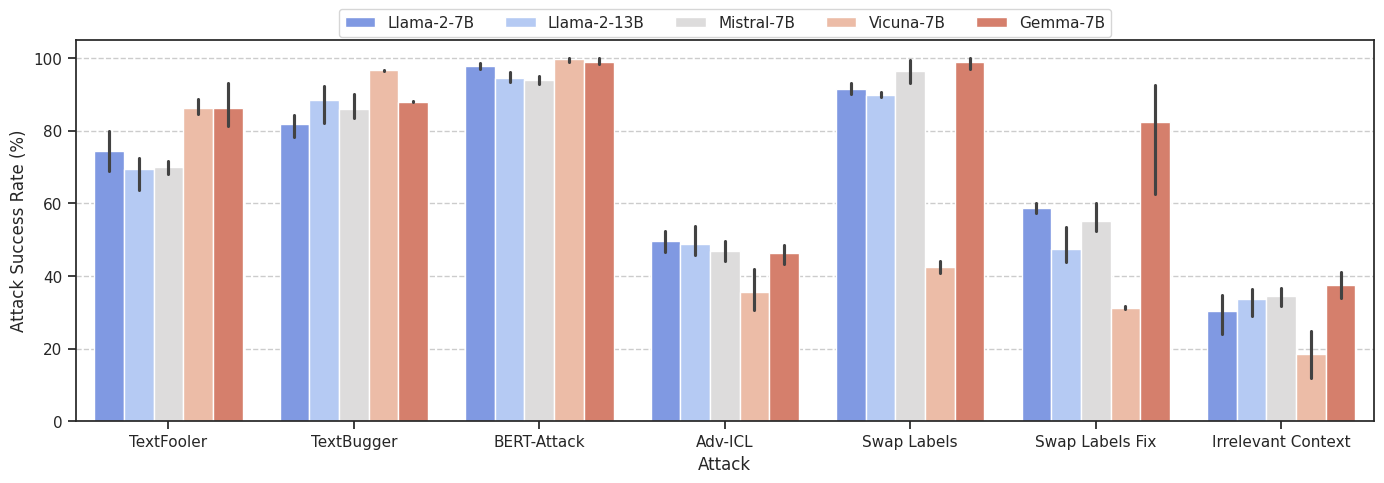

In [4]:
# plot the ASR with x axis as the model, y axis as the ASR, and hue as the attack
fig, ax = plt.subplots(figsize=(14, 5))
sns.set_theme(style="whitegrid")
color_platte = sns.color_palette("Paired")
# reduce the alpha of the color
# color_platte = [color[:3] + (0.9,) for color in color_platte]
# ax = sns.barplot(x="attack", y="ASR", hue="model", data=df, palette=selected_color, alpha=0.6)
ax = sns.barplot(x="attack", y="ASR", hue="model", data=df, palette="coolwarm")
# grey background
# ax.set_facecolor('lightgrey')
# ax.set_title('ASR on RTE with ICL', fontsize=15)
# shift the 
ax.set_ylabel('Attack Success Rate (%)')
ax.set_xlabel('Attack')
# put the legend outside the plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# put the legent above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(df['attack'].unique()))
# grid with dotted lines
ax.grid(True, linestyle='--', axis='y')
# save the plot as svg with tight layout
plt.tight_layout()
plt.savefig('ICL-ASR-RTE.svg')
plt.show()

In [5]:
models = ["meta-llama/Llama-2-7b-hf",
          "meta-llama/Llama-2-13b-hf",
          "mistralai/Mistral-7B-v0.1",
          "lmsys/vicuna-7b-v1.5",
          "google/gemma-7b"
]
dataset='rte'

method = 'retrieval_icl'
attacks = ['textfooler', 'textbugger', 'bert_attack', 'icl_attack', 'swap_labels', 'swap_labels_fix', 'irrelevant_context']
# seeds = [1, 13, 42]
seed  = 1
retrievers = ['bm25', 'sbert', 'instructor']
# shots = [2, 4, 8, 16]
shots=[8]

results = []

for model in models:
    for attack in attacks:
        for retriever in retrievers:
            for shot in shots:
                attack_name = method
                # if attack in ['icl_attack', 'swap_labels', 'swap_labels_fix', 'irrelevant_context']:
                #     attack_name = 'icl_attack'
                # else:
                #     attack_name = method

                if attack == 'swap_labels_fix':
                    file = f"./{model}/swap_labels/{attack_name}-seed-{seed}-shot-{shot}/logs_swap_labels_{retriever}_fix_dist.txt"
                else:
                    file = f"./{model}/{attack}/{attack_name}-seed-{seed}-shot-{shot}/logs_{attack}_{retriever}.txt"
                if os.path.isfile(file):
                    with open(file) as f:
                        lines = f.readlines()
                        result = {'seed': seed, 'retriever': retriever, 'attack': attack, 'method': method, 'model': model}
                        for line in lines:
                            if 'Original accuracy:' in line:
                                result['Clean Acc'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                            elif 'Accuracy under attack:' in line:
                                result['Attack Acc'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                            elif 'Attack success rate:' in line:
                                result['ASR'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                            elif 'Average perturbed word %:' in line:
                                result['Perturbed Word Ratio'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                            elif 'Average Attack Perplexity:' in line:
                                result['Attack Perplexity'] = float(line.split(':')[1].strip().strip('| '))
                    results.append(result)
                else:
                    print(file)
                

./meta-llama/Llama-2-7b-hf/textfooler/retrieval_icl-seed-1-shot-8/logs_textfooler_instructor.txt
./meta-llama/Llama-2-7b-hf/swap_labels/retrieval_icl-seed-1-shot-8/logs_swap_labels_bm25.txt
./meta-llama/Llama-2-7b-hf/swap_labels/retrieval_icl-seed-1-shot-8/logs_swap_labels_bm25_fix_dist.txt
./meta-llama/Llama-2-7b-hf/swap_labels/retrieval_icl-seed-1-shot-8/logs_swap_labels_instructor_fix_dist.txt
./meta-llama/Llama-2-7b-hf/irrelevant_context/retrieval_icl-seed-1-shot-8/logs_irrelevant_context_bm25.txt
./meta-llama/Llama-2-7b-hf/irrelevant_context/retrieval_icl-seed-1-shot-8/logs_irrelevant_context_sbert.txt
./meta-llama/Llama-2-7b-hf/irrelevant_context/retrieval_icl-seed-1-shot-8/logs_irrelevant_context_instructor.txt
./meta-llama/Llama-2-13b-hf/bert_attack/retrieval_icl-seed-1-shot-8/logs_bert_attack_bm25.txt
./meta-llama/Llama-2-13b-hf/bert_attack/retrieval_icl-seed-1-shot-8/logs_bert_attack_sbert.txt
./meta-llama/Llama-2-13b-hf/bert_attack/retrieval_icl-seed-1-shot-8/logs_bert_attac

In [6]:
df = pd.DataFrame(results)
# drop ASR, Perturbed Word Ratio and Attack Perplexity
# drop nan
df = df.dropna()
# drop method, shot, Perturbed Word Ratio and Attack Perplexity in column
df = df.drop(columns=['method', 'retriever', 'Perturbed Word Ratio', 'Attack Perplexity'])

# group by model and attack, compute mean and std across seeds
# df = df.groupby(['model', 'attack']).agg({'Clean Acc': ['mean'], 'Attack Acc': ['mean'], 'ASR': ['mean']}).reset_index()
# df.columns = ['model', 'attack', 'Clean Acc', 'Attack Acc', 'ASR']
df = df.round(2)

# df.loc[len(df)] = ['meta-llama/Llama-2-13b-hf', 'bert_attack', 79.30, 3.42, None]
# df.loc[len(df)] = ['meta-llama/Llama-2-7b-hf', 'textbugger', 73.04, 12.75, None]
# df.loc[len(df)] = ['meta-llama/Llama-2-7b-hf', 'textfooler', 73.04, 17.81, None]
# df.loc[len(df)] = ['meta-llama/Llama-2-7b-hf', 'swap_labels', 73.04, 6.14, None]
# df.loc[len(df)] = ['meta-llama/Llama-2-7b-hf', 'swap_labels_fix', 73.04, 30.45, None]
# df.loc[len(df)] = ['mistralai/Mistral-7B-v0.1', 'bert_attack', 80.32, 3.42, None]
# df.loc[len(df)] = ['mistralai/Mistral-7B-v0.1', 'swap_labels', 80.32, 2.01, None]
# df.loc[len(df)] = ['mistralai/Mistral-7B-v0.1', 'swap_labels_fix', 80.32, 32.01, None]
# df.loc[len(df)] = ['google/gemma-7b', 'swap_labels', 81.04,

# for model in models:
#     df.loc[len(df)] = [model, 'irrelevant_context', 0, 0, 0]
#     df.loc[len(df)] = [model, 'icl_attack', 0, 0, 0]

df['model'] = df['model'].map({
    'meta-llama/Llama-2-7b-hf': 'Llama-2-7B',
    'meta-llama/Llama-2-13b-hf': 'Llama-2-13B',
    'mistralai/Mistral-7B-v0.1': 'Mistral-7B',
    'lmsys/vicuna-7b-v1.5': 'Vicuna-7B',
    'google/gemma-7b': 'Gemma-7B'
})


attack_order = ['textfooler', 'textbugger', 'bert_attack', 'icl_attack', 'swap_labels', 'swap_labels_fix', 'irrelevant_context']
df['attack'] = pd.Categorical(df['attack'], categories=attack_order, ordered=True)
df = df.sort_values(by='attack')
order = ['Llama-2-7B', 'Llama-2-13B', 'Mistral-7B', 'Vicuna-7B', 'Gemma-7B']
df['model'] = pd.Categorical(df['model'], categories=order, ordered=True)
df = df.sort_values(by='model')

# map attack to human readable name
df['attack'] = df['attack'].map(
    {
    'textfooler': 'TextFooler',
    'textbugger': 'TextBugger',
    'bert_attack': 'BERT-Attack',
    'icl_attack': 'Adv-ICL',
    'swap_labels': 'Swap Labels',
    'swap_labels_fix': 'Swap Labels Fix',
    'irrelevant_context': 'Irrelevant Context'
    }
)

df['ASR'] = ((df['Clean Acc'] - df['Attack Acc']) / df['Clean Acc']) * 100
df = df.round(2)
df['ASR'] = df['ASR'].fillna(0)

df

,seed,attack,model,Clean Acc,Attack Acc,ASR
4,1,TextBugger,Llama-2-7B,68.95,22.38,67.54
7,1,BERT-Attack,Llama-2-7B,72.56,1.44,98.02
6,1,BERT-Attack,Llama-2-7B,72.56,0.36,99.50
5,1,BERT-Attack,Llama-2-7B,71.48,6.86,90.40
22,1,Swap Labels,Llama-2-13B,68.95,5.78,91.62
21,1,Swap Labels,Llama-2-13B,71.84,5.78,91.95
20,1,Swap Labels,Llama-2-13B,81.23,7.22,91.11
19,1,TextBugger,Llama-2-13B,76.90,4.69,93.90
17,1,TextBugger,Llama-2-13B,76.53,14.08,81.60
18,1,TextBugger,Llama-2-13B,78.34,6.14,92.16


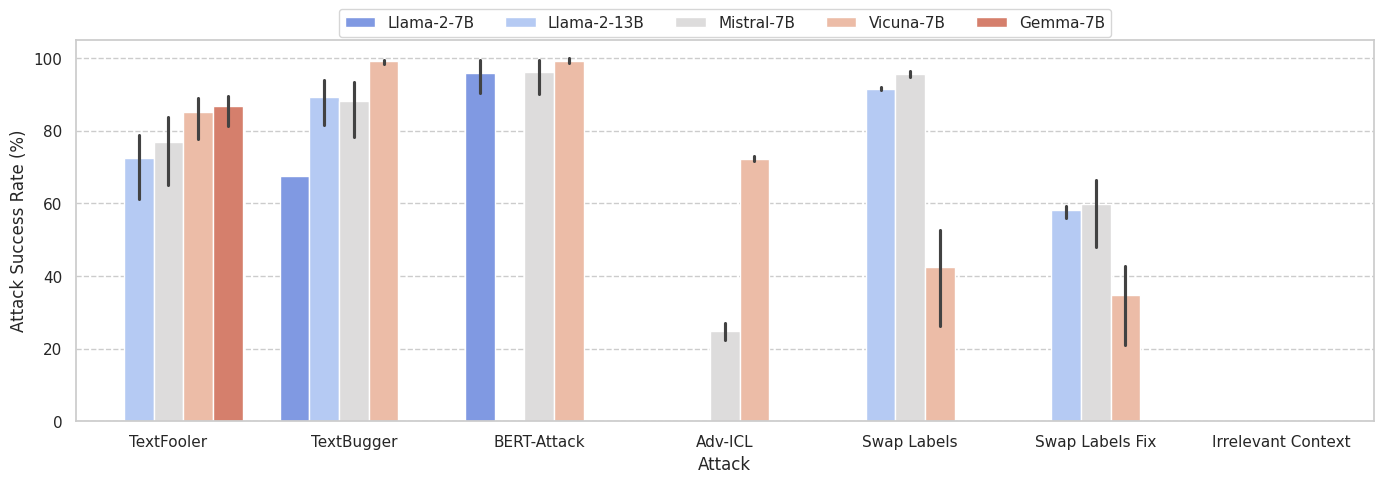

In [7]:
# plot the ASR with x axis as the model, y axis as the ASR, and hue as the attack
fig, ax = plt.subplots(figsize=(14, 5))
sns.set_theme(style="whitegrid")
color_platte = sns.color_palette("Paired")
# reduce the alpha of the color
# color_platte = [color[:3] + (0.9,) for color in color_platte]
# ax = sns.barplot(x="attack", y="ASR", hue="model", data=df, palette=selected_color, alpha=0.6)
ax = sns.barplot(x="attack", y="ASR", hue="model", data=df, palette='coolwarm', width=0.8)
# grey background
# ax.set_facecolor('lightgrey')
# ax.set_title('ASR on RTE with ICL', fontsize=15)
# shift the 
ax.set_ylabel('Attack Success Rate (%)')
ax.set_xlabel('Attack')
# put the legend outside the plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# put the legent above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(df['attack'].unique()))
# grid with dotted lines
ax.grid(True, linestyle='--', axis='y')
# save the plot as svg with tight layout
plt.tight_layout()
plt.savefig('R-ICL-ASR-RTE.svg')
plt.show()